# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Boston Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the Boston data set using `load_boston()`. We won't bother to preprocess the data in this lab. If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [4]:
regression = LinearRegression()
boston = load_boston()

Create a baseline model which includes all the variables in the Boston housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [15]:
## code here
y = pd.DataFrame(boston.target, columns=['target'])
X = pd.DataFrame(boston.data, columns=boston.feature_names)
all_data = pd.concat([y,X], axis=1)

crossvalid = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalid))

In [6]:
baseline

0.7190106820189477

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

In [8]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))
combinations

[('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NOX', 'PTRATIO'),
 ('NOX', 'B'),
 ('NOX', 'LSTAT'),
 ('RM', 'AGE'),
 ('RM', 'DIS'),
 ('RM', 'RAD'),
 ('RM', 'TAX'),
 ('RM', 'PTRATIO'),
 ('RM', 'B'),
 

In [12]:
## code to find top 3 interactions by R^2 value here
df = X.copy()
interactions = []
for comb in combinations:
    df['combination'] = df[comb[0]] * df[comb[1]]
    score = np.mean(cross_val_score(regression, df, y, scoring='r2', cv=crossvalid))
    if score > baseline:
        interactions.append((comb[0], comb[1], round(score, 3)))
print("Top 3 interactions: %s" %sorted(interactions, key=lambda x: x[2], reverse=True)[:3])

Top 3 interactions: [('RM', 'LSTAT', 0.786), ('RM', 'TAX', 0.775), ('RM', 'RAD', 0.768)]


## Look at the top 3 interactions: "RM" as a confounding factor

The top three interactions seem to involve "RM", the number of rooms as a confounding variable for all of them. Let's have a look at interaction plots for all three of them. This exercise will involve:

- Splitting the data up in 3 groups: one for houses with a few rooms, one for houses with a "medium" amount of rooms, one for a high amount of rooms 
- Create a function `build_interaction_rm()`. This function takes an argument `varname` (which can be set equal to the column name as a string) and a column `description` (which describes the variable or varname, to be included on the x-axis of the plot). The function outputs a plot that uses "RM" as a confounding factor. Each plot should have three regression lines, one for each level of "RM"  

The data has been split into high, medium, and low number of rooms for you.

In [13]:
rm = np.asarray(df[['RM']]).reshape(len(df[['RM']]))

In [16]:
high_rm = all_data[rm > np.percentile(rm, 67)]
med_rm = all_data[(rm > np.percentile(rm, 33)) & (rm <= np.percentile(rm, 67))]
low_rm = all_data[rm <= np.percentile(rm, 33)]

Create `build_interaction_rm()`.

In [21]:
def build_interaction_rm(varname, description):
    regression_h = LinearRegression()
    regression_m = LinearRegression()
    regression_l = LinearRegression()
    regression_h.fit(high_rm[varname].values.reshape(-1,1), high_rm['target'])
    regression_m.fit(med_rm[varname].values.reshape(-1,1), med_rm['target'])
    regression_l.fit(low_rm[varname].values.reshape(-1,1), low_rm['target'])
    
    #make predictions
    pred_high = regression_h.predict(high_rm[varname].values.reshape(-1,1))
    pred_med = regression_m.predict(med_rm[varname].values.reshape(-1,1))
    pred_low = regression_l.predict(low_rm[varname].values.reshape(-1,1))
    
    #print coefficients
    print(regression_h.coef_)
    print(regression_m.coef_)
    print(regression_l.coef_)
    
    #plot outputs
    plt.figure(figsize=(10,6))
    
    plt.scatter(high_rm[varname], high_rm['target'], color='red', alpha=0.3, label='High Rooms')
    plt.scatter(med_rm[varname], med_rm['target'], color='blue', alpha=0.3, label='Medium Rooms')
    plt.scatter(low_rm[varname], low_rm['target'], color='green', alpha=0.3, label='Low Rooms')
    plt.plot(high_rm[varname], pred_high, color='red', linewidth=2)
    plt.plot(med_rm[varname], pred_med, color='blue', linewidth=2)
    plt.plot(low_rm[varname], pred_low, color='green', linewidth=2)
    plt.xlabel(description)
    plt.ylabel('House Value')
    plt.legend()

Next, use `build_interaction_rm()` with the three variables that came out with the highest effect on $R^2$. 

[-1.46614438]
[-0.67588205]
[-0.51981339]


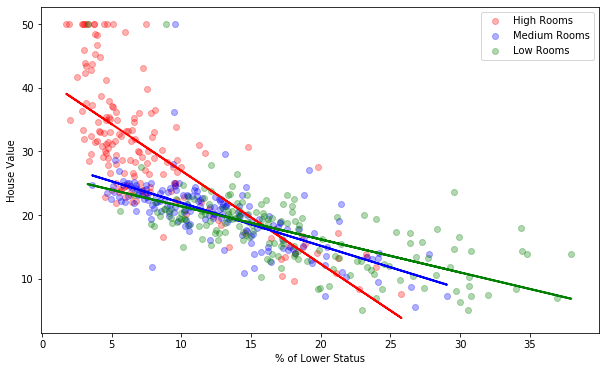

In [22]:
# first plot
build_interaction_rm('LSTAT', '% of Lower Status')

[-0.03708037]
[-0.01431143]
[-0.01166035]


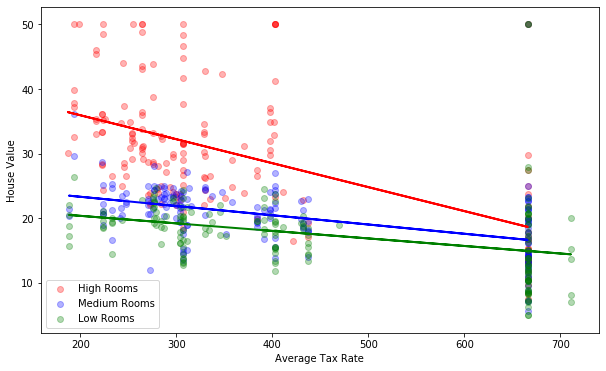

In [23]:
# second plot
build_interaction_rm('TAX', 'Average Tax Rate')

[-0.66803793]
[-0.24276834]
[-0.17393132]


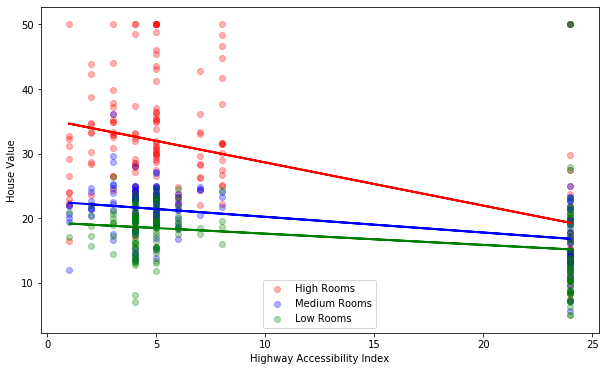

In [24]:
# third plot
build_interaction_rm('RAD', 'Highway Accessibility Index')

## Build a final model including all three interactions at once

Use 10-fold cross-validation to build a model using all the above interactions. 

In [26]:
# code here
df_inter = df.copy()
df_inter['RM_LSTAT'] = df['RM'] * df['LSTAT']
df_inter['RM_TAX'] = df['RM'] * df['TAX']
df_inter['RM_RAD'] = df['RM'] * df['RAD']

final_model = np.mean(cross_val_score(regression, df_inter, y, scoring='r2', cv=crossvalid))

In [27]:
# code here
final_model

0.7851761763556198

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if all these interactions are significant.

In [28]:
# code here
import statsmodels.api as sm
df_inter_sm = sm.add_constant(df_inter)
model = sm.OLS(y,df_inter_sm)
results = model.fit()

results.summary()

C:\Users\Devin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     126.6
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          1.87e-166
Time:                        22:58:49   Log-Likelihood:                -1413.2
No. Observations:                 506   AIC:                             2862.
Df Residuals:                     488   BIC:                             2938.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.8732      7.615     -2.216      0.027     -31.835      -1.912
CRIM           -0.1618      0.028     -5.720      0.000      -0.217      -0.106
ZN              0.0174      0.012      1.461      0.145      -0.006       0.041
INDUS           0.0944      0.053      1.787      0.075      -0.009       0.198
CHAS            2.6096      0.740      3.527      0.000       1.156       4.064
NOX           -13.4446      3.275     -4.105      0.000     -19.880      -7.009
RM             10.6918      0.992     10.778      0.000       8.743      12.641
AGE             0.0072      0.011      0.628      0.530      -0.015       0.030
DIS            -0.9510      0.175     -5.449      0.000      -1.294      -0.608
RAD             0.6610      0.478      1.383      0.167      -0.278       1.600
TAX             0.0344      0.025      1.400      0.162      -0.014       0.083
PTRATIO        -0.6957      0.113     -6.147      0.000      -0.918      -0.473
B               0.0128      0.007      1.814      0.070      -0.001       0.027
LSTAT           1.2738      0.253      5.041      0.000       0.777       1.770
combination    -0.0004      0.000     -1.201      0.230      -0.001       0.000
RM_LSTAT       -0.2896      0.041     -7.116      0.000      -0.370      -0.210
RM_TAX         -0.0074      0.004     -1.870      0.062      -0.015       0.000
RM_RAD         -0.0621      0.078     -0.793      0.428      -0.216       0.092
==============================================================================
Omnibus:                      252.409   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2471.073
Skew:                           1.944   Prob(JB):                         0.00
Kurtosis:                      13.104   Cond. No.                     2.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your conclusion here?

In [29]:
# formulate your conclusion
df_inter.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,combination,RM_LSTAT,RM_TAX,RM_RAD
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.193810,0.450529,0.527826,0.591175
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.318540,-0.419774,-0.254988,-0.295961
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.394627,0.606946,0.648660,0.569430
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,-0.010022,-0.052988,-0.003459,0.012112
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.360822,0.603520,0.610558,0.591331
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.551717,-0.492349,-0.015486,-0.074801
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.444783,0.627428,0.457527,0.437518
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.321935,-0.509215,-0.489037,-0.475902
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.195492,0.514001,0.879977,0.984215
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.261539,0.560237,0.953916,0.888006


In [39]:
#whooooole lotta multicollinearity going on. let's remove the original columns but keep the interaction columns we created

df_inter_minus = df_inter.copy()
df_inter_minus.drop(['TAX','LSTAT','RAD','RM_TAX'], axis=1, inplace=True)
df_inter_minus.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,combination,RM_LSTAT,RM_RAD
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.289946,-0.385064,0.193810,0.450529,0.591175
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.391679,0.175520,-0.318540,-0.419774,-0.295961
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.383248,-0.356977,0.394627,0.606946,0.569430
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.121515,0.048788,-0.010022,-0.052988,0.012112
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.188933,-0.380051,0.360822,0.603520,0.591331
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.355501,0.128069,-0.551717,-0.492349,-0.074801
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.261515,-0.273534,0.444783,0.627428,0.437518
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.232471,0.291512,-0.321935,-0.509215,-0.475902
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,1.000000,-0.177383,0.255312,0.378828,0.441102
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.177383,1.000000,0.319943,-0.402309,-0.439794


In [40]:
df_inter_minus_sm = sm.add_constant(df_inter_minus)
model = sm.OLS(y,df_inter_minus_sm)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     120.5
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          1.44e-143
Time:                        23:52:35   Log-Likelihood:                -1478.1
No. Observations:                 506   AIC:                             2984.
Df Residuals:                     492   BIC:                             3043.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.1274      4.998      6.028      0.000      20.307      39.948
CRIM           -0.0961      0.031     -3.084      0.002      -0.157      -0.035
ZN              0.0343      0.013      2.680      0.008       0.009       0.059
INDUS          -0.0551      0.053     -1.030      0.303      -0.160       0.050
CHAS            2.6829      0.823      3.261      0.001       1.066       4.299
NOX           -15.9519      3.682     -4.332      0.000     -23.187      -8.717
RM              5.1700      0.476     10.869      0.000       4.235       6.105
AGE             0.0069      0.013      0.535      0.593      -0.018       0.032
DIS            -1.3804      0.192     -7.188      0.000      -1.758      -1.003
PTRATIO        -0.8098      0.127     -6.359      0.000      -1.060      -0.560
B              -0.0101      0.007     -1.372      0.171      -0.025       0.004
combination     0.0008      0.000      2.448      0.015       0.000       0.002
RM_LSTAT       -0.1564      0.021     -7.502      0.000      -0.197      -0.115
RM_RAD          0.0145      0.006      2.241      0.025       0.002       0.027
==============================================================================
Omnibus:                      181.634   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.513
Skew:                           1.459   Prob(JB):                    4.58e-224
Kurtosis:                       9.345   Cond. No.                     1.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.